¡Hola, Rodrigo!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

## Imports Iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
hypotheses=pd.read_csv('/datasets/hypotheses_us.csv', sep=";")

In [3]:
print(hypotheses.columns)

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo importanto las bases de datos y las librerias necesarias para el ejercicio</div>

## Cambio de nombre de columnas a minúsculas

In [4]:
df_new_cols =[]
for old_value in hypotheses.columns:
    value_lowered=old_value.lower()
    df_new_cols.append(value_lowered)
    #print(df_new_cols)
hypotheses.columns=df_new_cols

In [5]:
print(hypotheses.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')


In [6]:
hypotheses.head(10)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


#### Orders

In [7]:
orders=pd.read_csv('/datasets/orders_us.csv')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


#### Visits

In [9]:
visits=pd.read_csv('/datasets/visits_us.csv')

In [10]:
visits['date']=pd.to_datetime(visits['date'])

In [11]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Selección de datos únicamente en un grupo

In [12]:

ord_1 = orders.groupby(['visitorId'])['group'].nunique().reset_index()
ord_1 = ord_1[ord_1['group'] != 1]
ord_1.head()


,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [13]:
orders = orders[~orders['visitorId'].isin(ord_1['visitorId'])]
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [14]:
print(orders.columns)

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')


## Priorización de Hipótesis

### Cálculo de ICE
Fórmule;    ICE = Impact * Confidence / Effort

In [15]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [16]:
hypotheses['ICE']=hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']  # Cálculo de ICE

In [17]:
print(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


#### Fórmula de RICE : 'Reach x Impact x Confidence / Effort

In [18]:
hypotheses['RICE']= (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence']/hypotheses['effort'])

In [19]:
print(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


#### Al incluír el parámetro Reach en el cálculo del parámetro para priorizar las hiótesis, vemos que éstas con un mayor efecto en clientes finales se ven favorecidas. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, Rodrigo. Excelente trabajo aplicando, analizando y comparando los frameworks RICE e ICE. Además, hiciste un excelente trabajo desarrollando un análisis de los hallazgos para la priorización de las hipótesis.  </div>

## Análisis de prueba AB

### Ingreso Acumulado por Grupo

In [20]:
# Conversión de variable date a datetime
orders['date']=pd.to_datetime(orders['date'])
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [21]:
#Suma de ingresos por día y grupo

daily_income=orders.groupby(['date', 'group'], as_index=False)['revenue'].sum()
print(daily_income.head())

        date group  revenue
0 2019-08-01     A   2266.6
1 2019-08-01     B    967.2
2 2019-08-02     A   1468.3
3 2019-08-02     B   2568.1
4 2019-08-03     A   1815.2


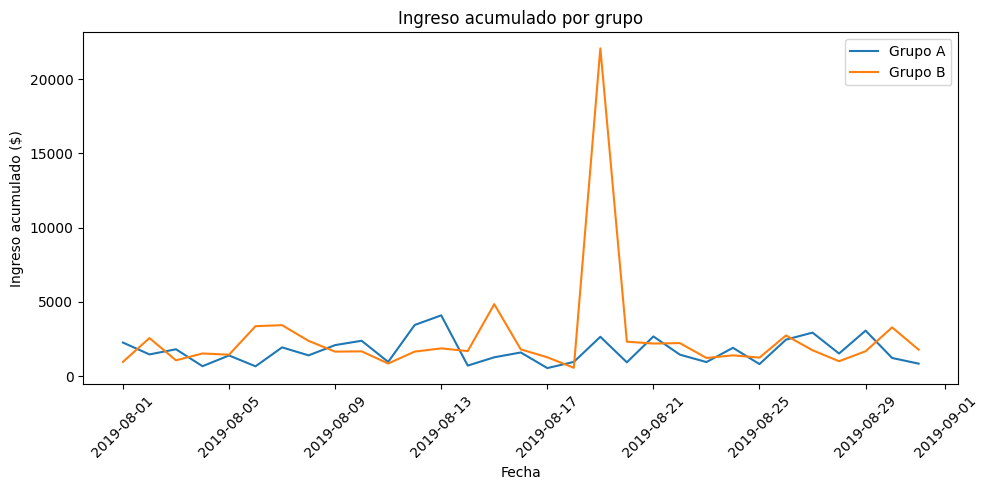

In [22]:
plt.figure(figsize=(10,5))
for grp in ['A', 'B']:
    grp_data = daily_income[daily_income['group']==grp]
    plt.plot(grp_data['date'], grp_data['revenue'], label=f'Grupo {grp}')
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de los ingresos acumulados por grupo.   </div>

#### Los ingresos de los dos grupos se mueven muchco a lo largo del tiempo comprendido por la prueba, pero alrededor del 20 de agosto, el B tiene un pico. No hay uno que sea comstantemente el más elevado.

### Pedido Promedio por Grupo

In [23]:
daily_mean=orders.groupby(['group', 'date'])['revenue'].mean()
daily_mean.head()

group  date      
A      2019-08-01    98.547826
       2019-08-02    77.278947
       2019-08-03    75.633333
       2019-08-04    61.409091
       2019-08-05    63.545455
Name: revenue, dtype: float64

In [24]:
# media acumulada por grupo, sin duplicar el nivel 'group'
daily = orders.groupby(['group', 'date'])['revenue'].mean()
avg_order = (
    daily_mean
      .groupby(level=0, group_keys=False)        # evita la 2ª capa 'group'
      .apply(lambda s: s.expanding().mean())     # media acumulada
      .reset_index(name='revenue')               # pasa índice a columnas
)

avg_order.head()

,group,date,revenue
0,A,2019-08-01,98.547826
1,A,2019-08-02,87.913387
2,A,2019-08-03,83.820036
3,A,2019-08-04,78.217299
4,A,2019-08-05,75.282930


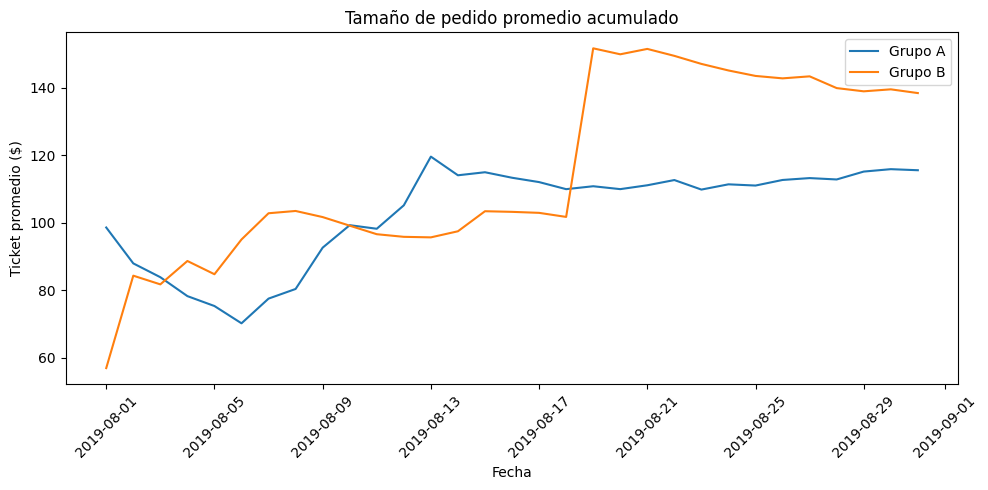

In [25]:
plt.figure(figsize=(10,5))
for g in ['A', 'B']:
    mask = avg_order['group'] == g
    plt.plot(avg_order.loc[mask, 'date'], avg_order.loc[mask, 'revenue'], label=f'Grupo {g}')
plt.title('Tamaño de pedido promedio acumulado')
plt.xlabel('Fecha'); plt.ylabel('Ticket promedio ($)')
plt.legend(); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A  </div>

#### El grupo B tiene una tendencia bastant marcada de incremento en el tamaño promedio acumulado, mientras que en el cadso del gupo A, aunque inició con un número mayor que el B, su aumento en el tiempo considerado es mucho menor que el del B, y durante los primeros ocho días es menor que el dato inicial.

### Diferencia relativa en el tamaño de pedido promedio acumulado

In [26]:
averages=(avg_order.pivot(index='date', columns='group', values='revenue').reset_index())
averages.head()

group,date,A,B
0,2019-08-01,98.547826,56.894118
1,2019-08-02,87.913387,84.275320
2,2019-08-03,83.820036,81.697832
3,2019-08-04,78.217299,88.623374
4,2019-08-05,75.282930,84.701556


In [27]:
averages['relative_diff'] = (averages['B'] - averages['A']) / averages['A']

In [28]:
averages.head()

group,date,A,B,relative_diff
0,2019-08-01,98.547826,56.894118,-0.422675
1,2019-08-02,87.913387,84.275320,-0.041382
2,2019-08-03,83.820036,81.697832,-0.025319
3,2019-08-04,78.217299,88.623374,0.133041
4,2019-08-05,75.282930,84.701556,0.125110


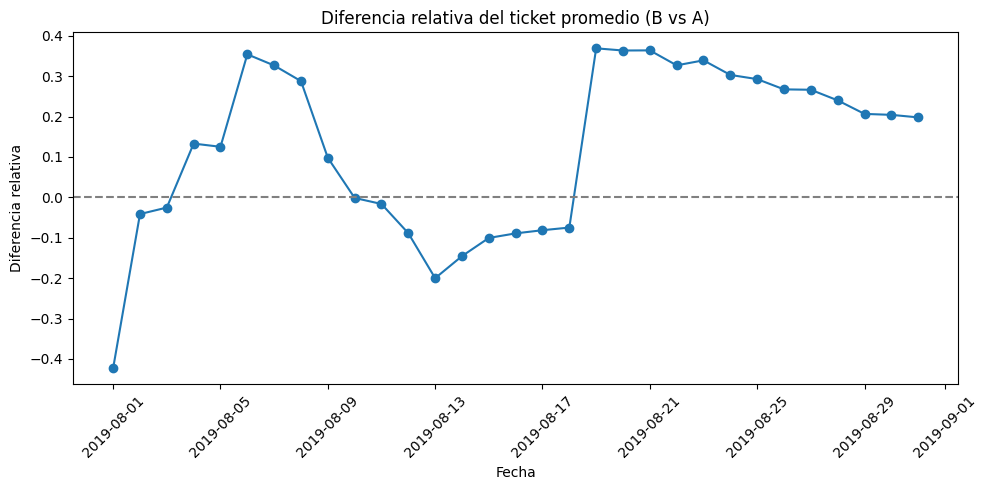

In [29]:
plt.figure(figsize=(10,5))
plt.plot(averages['date'], averages['relative_diff'], marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Diferencia relativa del ticket promedio (B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Diferencia entre el tamaño de pedidos por grupo. La zona ubicada en al región positiva, es en la que el tamaño de los pedidos del grupo B es mayor.

## Tasa de Conversión por Día

In [30]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [31]:
order_count=orders.groupby(['group','date']).agg({'transactionId':'nunique'}).reset_index()
order_count.rename(columns={'transactionId':'orders'}, inplace=True)

order_count.head()

,group,date,orders
0,A,2019-08-01,23
1,A,2019-08-02,19
2,A,2019-08-03,24
3,A,2019-08-04,11
4,A,2019-08-05,22


In [32]:
# Se uno el DF con Visits
daily=pd.merge(visits, order_count, on=['group','date'], how='left').fillna(0)
daily['conversion'] = daily['orders'] / daily['visits']

daily.head()


,date,group,visits,orders,conversion
0,2019-08-01,A,719,23,0.031989
1,2019-08-02,A,619,19,0.030695
2,2019-08-03,A,507,24,0.047337
3,2019-08-04,A,717,11,0.015342
4,2019-08-05,A,756,22,0.029101


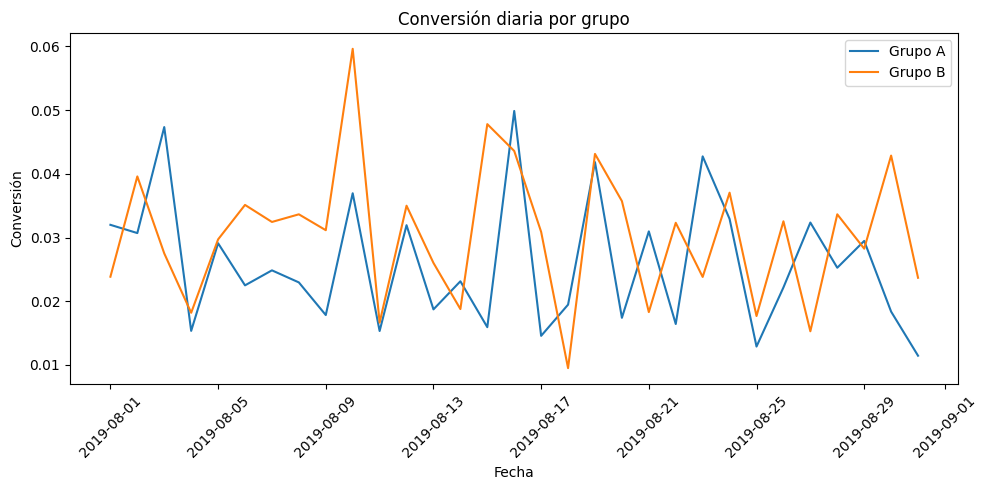

In [33]:
plt.figure(figsize=(10,5))
for grp in ['A','B']:
    grp_data = daily[daily['group']==grp]
    plt.plot(grp_data['date'], grp_data['conversion'], label=f'Grupo {grp}')
plt.title('Conversión diaria por grupo')
plt.xlabel('Fecha')
plt.ylabel('Conversión')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### El grupo B se manetiene pr envima del A a lo largo de cati  todo el tiempo esrtudidado.

## Número de Pedidos por Usuario

In [34]:
orders_per_user = orders.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()
orders_per_user.rename(columns={'transactionId':'orders'}, inplace=True)

orders_per_user.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


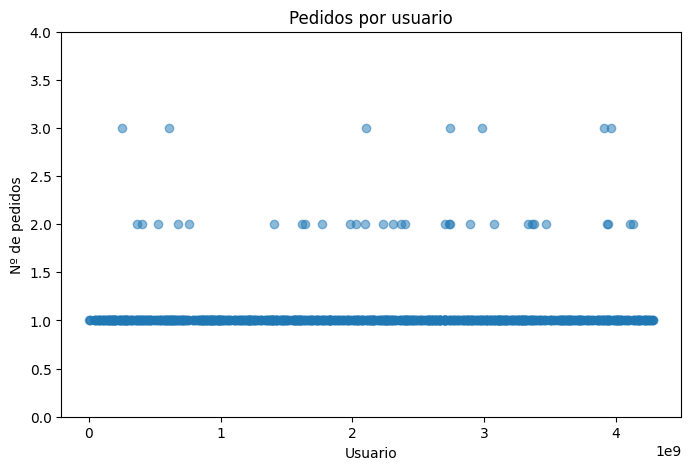

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(orders_per_user['visitorId'], orders_per_user['orders'], alpha=0.5)
plt.title('Pedidos por usuario')
plt.xlabel('Usuario')
plt.ylabel('Nº de pedidos')
plt.ylim(0, orders_per_user['orders'].max()+1)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo con el grafico desplegado para estudiar la distribución del numero de pedidos por cliente.   </div>

#### La gran mayoria de los usuarios realizan únicamente una compra.

## Percentiles 95 y 99

In [36]:
percentil_95 = np.percentile(orders_per_user['orders'], 95)
percentil_99 = np.percentile(orders_per_user['orders'], 99)
print(f'percentil 95: {percentil_95}, percentil 99: {percentil_99}')

percentil 95: 1.0, percentil 99: 2.0


In [37]:
# LEyton: el 1 % más activo de los usuarios (los de arriba del percentil 99) tiene más de 2 pedidos, mientras que la gran mayoría (99 %) no pasa de 2 pedidos.

## Precios de los Pedidos

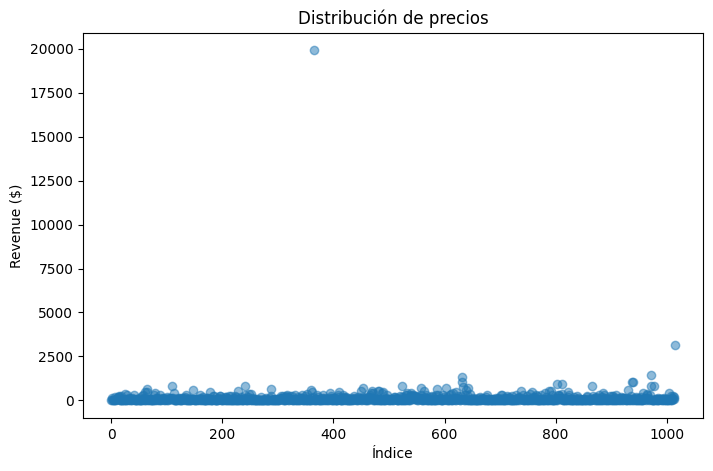

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(orders)), orders['revenue'], alpha=0.5)
plt.title('Distribución de precios')
plt.xlabel('Índice')
plt.ylabel('Revenue ($)')
plt.show()

#### Por lo que se puede ver en al gráfica anterior, la gran mayoría de los precios está en la región más baja. Existe un precio mucho más alto, 20,000.

<AxesSubplot:ylabel='Frequency'>

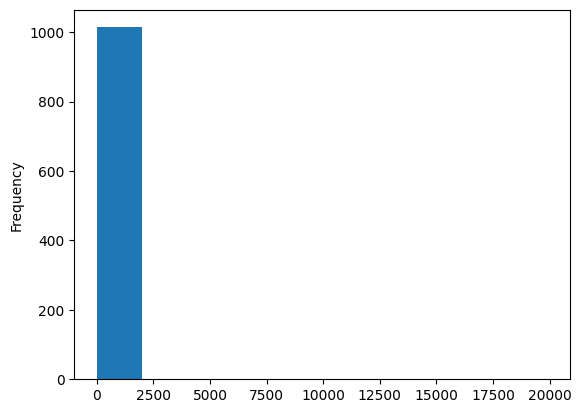

In [39]:
orders['revenue'].plot(kind='hist')

#### Este gráfico es una confiramcaión de lo encontrado anteriomente. El precio de 20000 no se alcanza a ver en este histograma, convendrái verificar si efectivamente es un precio real, o se trata de un error.

In [40]:
orders['revenue'].describe()

count     1016.000000
mean       130.770866
std        648.079810
min          5.000000
25%         20.775000
50%         50.100000
75%        126.950000
max      19920.400000
Name: revenue, dtype: float64

#### Mayor información sobre los precios de los pedidos

## Percentiles 95 y 99, precios

In [41]:
percentil_95 = np.percentile(orders['revenue'], 95)
percentil_99 = np.percentile(orders['revenue'], 99)
print(f'percentil 95: {percentil_95}, percentil 99: {percentil_99}')

percentil 95: 414.275, percentil 99: 830.3


#### Es de notar que la cantidad de precios entre los percentiles 95 y 99 son aproximadamente iguales a los encontrados antes de percentil 95.

## Significancia Estadística de la Diferencia de Conversión

### Debido a que las cantidades monetarias rara vez son normales, en estos caso se recomienda utilizar el modelo de Mann‑Whitney. Se utilizaráun ztest en el resto.

In [42]:
conversions = daily.groupby('group').agg({'orders':'sum', 'visits':'sum'})
conversions


,orders,visits
group,,
A,468,18736
B,548,18916


In [43]:
success = conversions['orders']
success

group
A    468
B    548
Name: orders, dtype: int64

In [44]:
trials = conversions['visits']
trials

group
A    18736
B    18916
Name: visits, dtype: int64

In [45]:
stat, pval = proportions_ztest(success, trials)
print(f'Estadístico z: {stat:.4f}, p-valor: {pval:.4f}')

Estadístico z: -2.3899, p-valor: 0.0169


#### El valor p obtenido es menor a 0.05, lo que indica una diferencia significativa entre los grupos

In [46]:
a_revenue = orders[orders['group']=='A']['revenue']
b_revenue = orders[orders['group']=='B']['revenue']

u_stat, pval_rev = stats.mannwhitneyu(a_revenue, b_revenue, alternative='two-sided')
print(f'U estadístico: {u_stat}, p-valor: {pval_rev:.4f}')

U estadístico: 129041.5, p-valor: 0.8622


#### El p valor obtenido indica que no existe una diferencia estadística significativa entre los grupos

## Significancia estadística de la Conversión

In [47]:
conversions = daily.groupby('group').agg({'orders':'sum', 'visits':'sum'})
conversions

,orders,visits
group,,
A,468,18736
B,548,18916


In [48]:
success = conversions['orders']
success

group
A    468
B    548
Name: orders, dtype: int64

In [49]:
trials = conversions['visits']
trials

group
A    18736
B    18916
Name: visits, dtype: int64

In [50]:
stat, pval = proportions_ztest(success, trials)
print(f'Estadístico z: {stat:.4f}, p-valor: {pval:.4f}')

Estadístico z: -2.3899, p-valor: 0.0169


#### El p valor obtenido indica que existe una diferencia estadística significativa entre los grupos

## Significancia Estadística de Diferencia en Tamaño Promedio

In [51]:
a_revenue = orders[orders['group']=='A']['revenue']
b_revenue = orders[orders['group']=='B']['revenue']

u_stat, pval_rev = stats.mannwhitneyu(a_revenue, b_revenue, alternative='two-sided')
print(f'U estadístico: {u_stat}, p-valor: {pval_rev:.4f}')

U estadístico: 129041.5, p-valor: 0.8622



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>



Excelente trabajo con el desarrollo de esta sección donde hacemos las pruebas estadísticas </div>

#### Este resultado indica que no existe unqa diferencia estadística significativa entre los grupos.

## Conclusiones y desición final

#### Se han estudiado muchos valores estadísticos de los grupos que se han construíde en la prueba, pero el análisis de al diferencia estadsística entre ambos no deja  ver con claridad si son o no esadísticamente infependiantes entre si, por lo que la recomendación es DETENER la prueba, al no tener certeza de la calidad de la información que se obtendría de al misma.